In [1]:
# 책에서처럼 일단 공동 import를 하자
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 불필요한 warning이 나오지 않도록 하는 곳
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Kernel SVM을 사용
from sklearn.svm import SVC

In [3]:
# mnist 데이터셋을 불러오자
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape, mnist.target.shape)

(70000, 784) (70000,)


In [4]:
# train set과 test set을 분리해야 한다.
# train과 test set을 그냥 numpy형태로 다 바꿔서 귀찮게 하지 말자.
from sklearn.model_selection import train_test_split
mnist_data = mnist.data.to_numpy()
mnist_target = mnist.target.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_target, train_size=7000, test_size=7000,random_state=0)
# 잘 나뉘었는가 확인
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 784)
(7000, 784)
(7000,)
(7000,)


- 일단 train data를 75%로 하면 시간이 너무 오래 걸린다... 줄여서 일단 시간을 확보해야 함. 심지어 확인하는데도 시간이 너무 오래 걸린다.
- 0.5로 줄여서 다시 학습 시도(2분이 넘어가면 바로 종료하자.) >> 2분을 넘어간다
- 0.25로 줄여서 다시 학습 시도 >> 2분을 넘어간다
- 0.1로 그러면 줄일 수 밖에 없다. >> 20초가 걸리네. 그래도 확인절차와 겹치면 model당 5분은 걸릴 듯
- 'rbf'가 gaussaian kernel, 'poly'는 다항 커널이다.
- 우선 kernel을 'rbf'로 유지한 후, C값은 유지한 채 gamma를 변화해가면서 accuracy를 확인해봐야 한다.
- test set이 너무 커서 다 확인을 하기가 힘드니까 train set과 동일한 크기로 설정하자. 
- gamma가 작으면 작을수록 정확도가 좀 더 올라가던데.... C값에 따른 변화를 gamma를 0.0001로 설정한 이후 확인해보자.
- 굉장히 섬세하구나. gamma=scale이 정답이었다!
- gamma=scale로 하고 C값에 따른 변화를 다시 보자. >> C가 클수록 정확도가 올라간다. C를 더 키워서 테스트 >> 1과 10사이에 최댓값이 있을 듯. >> 3이다.
- 결론 : gamma=scale로 하고 C는 3으로 설정하면 test accuracy가 0.965로 가장 높다.

In [32]:
# scale에서 사용되는 X.var()은 실제로 어떤 값인가?
print(X_train.var())

6195.9842825837995


In [19]:
# kernel SVM을 training data를 이용해 학습시키자

import joblib
joblib.parallel_backend('threading', n_jobs=-1)

svm_models_01 = []
train_score_01 = []
test_score_01 = []
Kernel_01 = 'rbf'
Gamma_01 = 'scale'
C_list_01 = [10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001]
for c in C_list_01:
    print("kernel={} C={} gamma={} train start".format(Kernel_01, c, Gamma_01))
    svm = SVC(kernel=Kernel_01, C=c, gamma=Gamma_01).fit(X_train, y_train)
    train_score_01.append(svm.score(X_train, y_train))
    print("train accuracy calculated")
    test_score_01.append(svm.score(X_test, y_test))
    print("test accuracy calculated")
    svm_models_01.append(svm)
    print("kernel={} C={} gamma={} train end".format(Kernel_01, c, Gamma_01))

kernel=rbf C=10 gamma=scale train start
train accuracy calculated
test accuracy calculated
kernel=rbf C=10 gamma=scale train end
kernel=rbf C=1 gamma=scale train start
train accuracy calculated
test accuracy calculated
kernel=rbf C=1 gamma=scale train end
kernel=rbf C=0.1 gamma=scale train start
train accuracy calculated
test accuracy calculated
kernel=rbf C=0.1 gamma=scale train end
kernel=rbf C=0.01 gamma=scale train start
train accuracy calculated
test accuracy calculated
kernel=rbf C=0.01 gamma=scale train end
kernel=rbf C=0.001 gamma=scale train start
train accuracy calculated
test accuracy calculated
kernel=rbf C=0.001 gamma=scale train end
kernel=rbf C=0.0001 gamma=scale train start
train accuracy calculated
test accuracy calculated
kernel=rbf C=0.0001 gamma=scale train end
kernel=rbf C=1e-05 gamma=scale train start
train accuracy calculated
test accuracy calculated
kernel=rbf C=1e-05 gamma=scale train end
kernel=rbf C=1e-06 gamma=scale train start
train accuracy calculated
test

In [20]:
# 예측을 잘 했는가 test
for i, c in enumerate(C_list_01):
    print("kernel={} C={} gamma={} train accuracy : {} / test accuracy : {}".format(Kernel_01, c, Gamma_01, train_score_01[i], test_score_01[i]))

kernel=rbf C=10 gamma=scale train accuracy : 1.0 / test accuracy : 0.9641428571428572
kernel=rbf C=1 gamma=scale train accuracy : 0.9832857142857143 / test accuracy : 0.9578571428571429
kernel=rbf C=0.1 gamma=scale train accuracy : 0.9264285714285714 / test accuracy : 0.9212857142857143
kernel=rbf C=0.01 gamma=scale train accuracy : 0.6785714285714286 / test accuracy : 0.6751428571428572
kernel=rbf C=0.001 gamma=scale train accuracy : 0.10928571428571429 / test accuracy : 0.11642857142857142
kernel=rbf C=0.0001 gamma=scale train accuracy : 0.10928571428571429 / test accuracy : 0.11642857142857142
kernel=rbf C=1e-05 gamma=scale train accuracy : 0.10928571428571429 / test accuracy : 0.11642857142857142
kernel=rbf C=1e-06 gamma=scale train accuracy : 0.10928571428571429 / test accuracy : 0.11642857142857142


In [21]:
import joblib
joblib.parallel_backend('threading', n_jobs=-1)

svm_models_02 = []
train_score_02 = []
test_score_02 = []
Kernel_02 = 'rbf'
Gamma_02 = 'scale'
C_list_02 = [10*i for i in range(2,10)]
for c in C_list_02:
    print("kernel={} C={} gamma={} train start".format(Kernel_02, c, Gamma_02))
    svm = SVC(kernel=Kernel_02, C=c, gamma=Gamma_02).fit(X_train, y_train)
    train_score_02.append(svm.score(X_train, y_train))
    test_score_02.append(svm.score(X_test, y_test))
    svm_models_02.append(svm)
    print("kernel={} C={} gamma={} train end".format(Kernel_02, c, Gamma_02))

kernel=rbf C=20 gamma=scale train start
kernel=rbf C=20 gamma=scale train end
kernel=rbf C=30 gamma=scale train start
kernel=rbf C=30 gamma=scale train end
kernel=rbf C=40 gamma=scale train start
kernel=rbf C=40 gamma=scale train end
kernel=rbf C=50 gamma=scale train start
kernel=rbf C=50 gamma=scale train end
kernel=rbf C=60 gamma=scale train start
kernel=rbf C=60 gamma=scale train end
kernel=rbf C=70 gamma=scale train start
kernel=rbf C=70 gamma=scale train end
kernel=rbf C=80 gamma=scale train start
kernel=rbf C=80 gamma=scale train end
kernel=rbf C=90 gamma=scale train start
kernel=rbf C=90 gamma=scale train end


In [22]:
# 예측을 잘 했는가 test
for i, c in enumerate(C_list_02):
    print("kernel={} C={} gamma={} train accuracy : {} / test accuracy : {}".format(Kernel_02, c, Gamma_02, train_score_02[i], test_score_02[i]))

kernel=rbf C=20 gamma=scale train accuracy : 1.0 / test accuracy : 0.964
kernel=rbf C=30 gamma=scale train accuracy : 1.0 / test accuracy : 0.964
kernel=rbf C=40 gamma=scale train accuracy : 1.0 / test accuracy : 0.964
kernel=rbf C=50 gamma=scale train accuracy : 1.0 / test accuracy : 0.964
kernel=rbf C=60 gamma=scale train accuracy : 1.0 / test accuracy : 0.964
kernel=rbf C=70 gamma=scale train accuracy : 1.0 / test accuracy : 0.964
kernel=rbf C=80 gamma=scale train accuracy : 1.0 / test accuracy : 0.964
kernel=rbf C=90 gamma=scale train accuracy : 1.0 / test accuracy : 0.964


In [25]:
import joblib
joblib.parallel_backend('threading', n_jobs=-1)

svm_models_04 = []
train_score_04 = []
test_score_04 = []
Kernel_04 = 'rbf'
Gamma_04 = 'scale'
C_list_04 = [i for i in range(2,10)]
for c in C_list_04:
    print("kernel={} C={} gamma={} train start".format(Kernel_04, c, Gamma_04))
    svm = SVC(kernel=Kernel_04, C=c, gamma=Gamma_04).fit(X_train, y_train)
    train_score_04.append(svm.score(X_train, y_train))
    test_score_04.append(svm.score(X_test, y_test))
    svm_models_04.append(svm)
    print("kernel={} C={} gamma={} train end".format(Kernel_04, c, Gamma_04))

kernel=rbf C=2 gamma=scale train start
kernel=rbf C=2 gamma=scale train end
kernel=rbf C=3 gamma=scale train start
kernel=rbf C=3 gamma=scale train end
kernel=rbf C=4 gamma=scale train start
kernel=rbf C=4 gamma=scale train end
kernel=rbf C=5 gamma=scale train start
kernel=rbf C=5 gamma=scale train end
kernel=rbf C=6 gamma=scale train start
kernel=rbf C=6 gamma=scale train end
kernel=rbf C=7 gamma=scale train start
kernel=rbf C=7 gamma=scale train end
kernel=rbf C=8 gamma=scale train start
kernel=rbf C=8 gamma=scale train end
kernel=rbf C=9 gamma=scale train start
kernel=rbf C=9 gamma=scale train end


In [26]:
# 예측을 잘 했는가 test
for i, c in enumerate(C_list_04):
    print("kernel={} C={} gamma={} train accuracy : {} / test accuracy : {}".format(Kernel_04, c, Gamma_04, train_score_04[i], test_score_04[i]))

kernel=rbf C=2 gamma=scale train accuracy : 0.9948571428571429 / test accuracy : 0.9625714285714285
kernel=rbf C=3 gamma=scale train accuracy : 0.9981428571428571 / test accuracy : 0.9651428571428572
kernel=rbf C=4 gamma=scale train accuracy : 0.9994285714285714 / test accuracy : 0.9645714285714285
kernel=rbf C=5 gamma=scale train accuracy : 0.9995714285714286 / test accuracy : 0.9641428571428572
kernel=rbf C=6 gamma=scale train accuracy : 0.9997142857142857 / test accuracy : 0.9638571428571429
kernel=rbf C=7 gamma=scale train accuracy : 0.9997142857142857 / test accuracy : 0.9641428571428572
kernel=rbf C=8 gamma=scale train accuracy : 0.9998571428571429 / test accuracy : 0.9637142857142857
kernel=rbf C=9 gamma=scale train accuracy : 1.0 / test accuracy : 0.9638571428571429


In [28]:
import joblib
joblib.parallel_backend('threading', n_jobs=-1)

svm_models_05 = []
train_score_05 = []
test_score_05 = []
Kernel_05 = 'rbf'
Gamma_05 = 'scale'
C_list_05 = [2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9]
for c in C_list_05:
    print("kernel={} C={} gamma={} train start".format(Kernel_05, c, Gamma_05))
    svm = SVC(kernel=Kernel_05, C=c, gamma=Gamma_05).fit(X_train, y_train)
    train_score_05.append(svm.score(X_train, y_train))
    test_score_05.append(svm.score(X_test, y_test))
    svm_models_05.append(svm)
    print("kernel={} C={} gamma={} train end".format(Kernel_05, c, Gamma_05))

kernel=rbf C=2.1 gamma=scale train start
kernel=rbf C=2.1 gamma=scale train end
kernel=rbf C=2.2 gamma=scale train start
kernel=rbf C=2.2 gamma=scale train end
kernel=rbf C=2.3 gamma=scale train start
kernel=rbf C=2.3 gamma=scale train end
kernel=rbf C=2.4 gamma=scale train start
kernel=rbf C=2.4 gamma=scale train end
kernel=rbf C=2.5 gamma=scale train start
kernel=rbf C=2.5 gamma=scale train end
kernel=rbf C=2.6 gamma=scale train start
kernel=rbf C=2.6 gamma=scale train end
kernel=rbf C=2.7 gamma=scale train start
kernel=rbf C=2.7 gamma=scale train end
kernel=rbf C=2.8 gamma=scale train start
kernel=rbf C=2.8 gamma=scale train end
kernel=rbf C=2.9 gamma=scale train start
kernel=rbf C=2.9 gamma=scale train end


In [29]:
# 예측을 잘 했는가 test
for i, c in enumerate(C_list_05):
    print("kernel={} C={} gamma={} train accuracy : {} / test accuracy : {}".format(Kernel_05, c, Gamma_05, train_score_05[i], test_score_05[i]))

kernel=rbf C=2.1 gamma=scale train accuracy : 0.9951428571428571 / test accuracy : 0.9625714285714285
kernel=rbf C=2.2 gamma=scale train accuracy : 0.9958571428571429 / test accuracy : 0.9635714285714285
kernel=rbf C=2.3 gamma=scale train accuracy : 0.9961428571428571 / test accuracy : 0.9634285714285714
kernel=rbf C=2.4 gamma=scale train accuracy : 0.9962857142857143 / test accuracy : 0.9642857142857143
kernel=rbf C=2.5 gamma=scale train accuracy : 0.9965714285714286 / test accuracy : 0.9641428571428572
kernel=rbf C=2.6 gamma=scale train accuracy : 0.9971428571428571 / test accuracy : 0.9645714285714285
kernel=rbf C=2.7 gamma=scale train accuracy : 0.9974285714285714 / test accuracy : 0.9645714285714285
kernel=rbf C=2.8 gamma=scale train accuracy : 0.9977142857142857 / test accuracy : 0.965
kernel=rbf C=2.9 gamma=scale train accuracy : 0.998 / test accuracy : 0.965


In [30]:
import joblib
joblib.parallel_backend('threading', n_jobs=-1)

svm_models_06 = []
train_score_06 = []
test_score_06 = []
Kernel_06 = 'rbf'
Gamma_06 = 'scale'
C_list_06 = [3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9]
for c in C_list_06:
    print("kernel={} C={} gamma={} train start".format(Kernel_06, c, Gamma_06))
    svm = SVC(kernel=Kernel_06, C=c, gamma=Gamma_06).fit(X_train, y_train)
    train_score_06.append(svm.score(X_train, y_train))
    test_score_06.append(svm.score(X_test, y_test))
    svm_models_06.append(svm)
    print("kernel={} C={} gamma={} train end".format(Kernel_06, c, Gamma_06))

kernel=rbf C=3.1 gamma=scale train start
kernel=rbf C=3.1 gamma=scale train end
kernel=rbf C=3.2 gamma=scale train start
kernel=rbf C=3.2 gamma=scale train end
kernel=rbf C=3.3 gamma=scale train start
kernel=rbf C=3.3 gamma=scale train end
kernel=rbf C=3.4 gamma=scale train start
kernel=rbf C=3.4 gamma=scale train end
kernel=rbf C=3.5 gamma=scale train start
kernel=rbf C=3.5 gamma=scale train end
kernel=rbf C=3.6 gamma=scale train start
kernel=rbf C=3.6 gamma=scale train end
kernel=rbf C=3.7 gamma=scale train start
kernel=rbf C=3.7 gamma=scale train end
kernel=rbf C=3.8 gamma=scale train start
kernel=rbf C=3.8 gamma=scale train end
kernel=rbf C=3.9 gamma=scale train start
kernel=rbf C=3.9 gamma=scale train end


In [31]:
# 예측을 잘 했는가 test
for i, c in enumerate(C_list_06):
    print("kernel={} C={} gamma={} train accuracy : {} / test accuracy : {}".format(Kernel_06, c, Gamma_06, train_score_06[i], test_score_06[i]))

kernel=rbf C=3.1 gamma=scale train accuracy : 0.9984285714285714 / test accuracy : 0.9648571428571429
kernel=rbf C=3.2 gamma=scale train accuracy : 0.9985714285714286 / test accuracy : 0.965
kernel=rbf C=3.3 gamma=scale train accuracy : 0.9985714285714286 / test accuracy : 0.9647142857142857
kernel=rbf C=3.4 gamma=scale train accuracy : 0.9985714285714286 / test accuracy : 0.9647142857142857
kernel=rbf C=3.5 gamma=scale train accuracy : 0.9987142857142857 / test accuracy : 0.9647142857142857
kernel=rbf C=3.6 gamma=scale train accuracy : 0.9988571428571429 / test accuracy : 0.9647142857142857
kernel=rbf C=3.7 gamma=scale train accuracy : 0.999 / test accuracy : 0.9648571428571429
kernel=rbf C=3.8 gamma=scale train accuracy : 0.999 / test accuracy : 0.9648571428571429
kernel=rbf C=3.9 gamma=scale train accuracy : 0.9991428571428571 / test accuracy : 0.9647142857142857


In [6]:
import joblib
joblib.parallel_backend('threading', n_jobs=-1)

svm_models_03 = []
train_score_03 = []
test_score_03 = []
Kernel_03 = 'rbf'
Gamma_list_03 = [100,10,1,0.1,0.01,0.001,0.0001,0.00001]
C_03 = 1
for gamma in Gamma_list_03:
    print("kernel={} C={} gamma={} train start".format(Kernel_03, C_03, gamma))
    svm = SVC(kernel=Kernel_03, C=C_03, gamma=gamma).fit(X_train, y_train)
    train_score_03.append(svm.score(X_train, y_train))
    print("train accuracy calculated")
    test_score_03.append(svm.score(X_test, y_test))
    print("test accuracy calculated")
    svm_models_03.append(svm)
    print("kernel={} C={} gamma={} train end".format(Kernel_03, C_03, gamma))

kernel=rbf C=1 gamma=100 train start
train accuracy calculated
test accuracy calculated
kernel=rbf C=1 gamma=100 train end
kernel=rbf C=1 gamma=10 train start
train accuracy calculated
test accuracy calculated
kernel=rbf C=1 gamma=10 train end
kernel=rbf C=1 gamma=1 train start
train accuracy calculated
test accuracy calculated
kernel=rbf C=1 gamma=1 train end
kernel=rbf C=1 gamma=0.1 train start
train accuracy calculated
test accuracy calculated
kernel=rbf C=1 gamma=0.1 train end
kernel=rbf C=1 gamma=0.01 train start
train accuracy calculated
test accuracy calculated
kernel=rbf C=1 gamma=0.01 train end
kernel=rbf C=1 gamma=0.001 train start
train accuracy calculated
test accuracy calculated
kernel=rbf C=1 gamma=0.001 train end
kernel=rbf C=1 gamma=0.0001 train start
train accuracy calculated
test accuracy calculated
kernel=rbf C=1 gamma=0.0001 train end
kernel=rbf C=1 gamma=1e-05 train start
train accuracy calculated
test accuracy calculated
kernel=rbf C=1 gamma=1e-05 train end


In [7]:
# 예측을 잘 했는가 test
for i, gamma in enumerate(Gamma_list_03):
    print("kernel={} C={} gamma={} train accuracy : {} / test accuracy : {}".format(Kernel_03, C_03, gamma, train_score_03[i], test_score_03[i]))

kernel=rbf C=1 gamma=100 train accuracy : 1.0 / test accuracy : 0.11642857142857142
kernel=rbf C=1 gamma=10 train accuracy : 1.0 / test accuracy : 0.11642857142857142
kernel=rbf C=1 gamma=1 train accuracy : 1.0 / test accuracy : 0.11642857142857142
kernel=rbf C=1 gamma=0.1 train accuracy : 1.0 / test accuracy : 0.11642857142857142
kernel=rbf C=1 gamma=0.01 train accuracy : 1.0 / test accuracy : 0.11642857142857142
kernel=rbf C=1 gamma=0.001 train accuracy : 1.0 / test accuracy : 0.11642857142857142
kernel=rbf C=1 gamma=0.0001 train accuracy : 1.0 / test accuracy : 0.11642857142857142
kernel=rbf C=1 gamma=1e-05 train accuracy : 1.0 / test accuracy : 0.16485714285714287


prediction 1 : 1
prediction 2 : 1
prediction 3 : 1
prediction 4 : 1
prediction 5 : 1
prediction 6 : 1
prediction 7 : 1
prediction 8 : 1
prediction 9 : 1
prediction 10 : 1


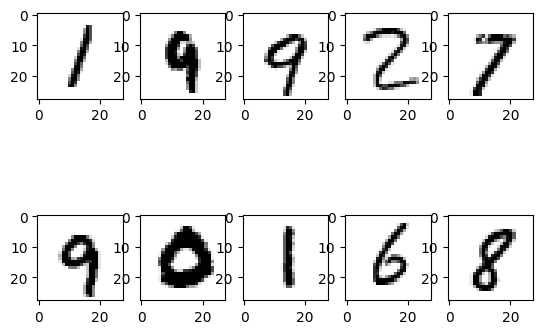

In [7]:
# test set에서 랜덤하게 10개를 뽑은 후 이를 출력해서 예측값과 실제 값이 맞는지 틀린지 확인해보자
rand_index = np.random.randint(low=0, high=len(X_test), size=10)
for randin, i in zip(rand_index, range(1,len(rand_index)+1)):
    predict = X_test[randin].reshape(1,-1)
    print("prediction {} : {}".format(i,svm.predict(predict)[0]))
    plt.subplot(2,5,i)
    plt.imshow((X_test[randin].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')